# $\phi_4$ model

***

For the Hamiltonian of the two-dimension $\Phi^4$​ model (10 $\times$ 10),
$$
\cal{H}=\sum_{i=1}^Nv(\phi_i)+\cal{H_I}
$$
with local and intraction terms
$$
\beta v(\phi_i)=-\frac{b}{2}\phi_i^2+\frac{1}{4}\phi_i^4,\quad\beta\cal{H_I}=-\sum_{<i,j>}\phi_i\phi_j.
$$

We will use Monte Carlo method to find the dependance of the order parameter $m=|\sum_{i=1}^N\phi_i/N|$ on $b$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

We will drive random numbers from $g(\phi_i)=C^{-1}e^{-\beta v(\phi_i)}$ which will then be passed to $h(\phi_i)=min(1,e^{-\beta \cal{H_I}})$.

In [3]:
def rejection(b,n):
  x1=np.random.normal(loc=0,scale=np.sqrt(-1/b),size=(n,n))
  y=np.zeros((n,n),float)
  for column in range(n):
    for element in range(n):
      x=x1[column][element]
      h=np.exp((-1/4)*(x**4))
      y1=np.random.uniform()
      if y1<=h:
        y[column][element]=x1[column][element]  

  return y

In [4]:
def rejection1(b):
  x1=np.random.normal(loc=0,scale=np.sqrt(-1/b))
  y=0
  
  x=x1
  h=np.exp((-1/4)*(x**4))
  y1=np.random.uniform()
  if y1<=h:
    y=x1

  return y

In [5]:
def metro(config,b,n):
    for j in range(n*n):
      row=np.random.randint(0,n)
      col=np.random.randint(0,n)
      phai=config[row][col]
      nb = config[(row+1)%n][col] + config[row][(col+1)%n] + config[(row-1)%n][col] + config[row][(col-1)%n]
      phai_new=rejection1(b)
      cost=-(phai_new-phai)*nb
      y=np.random.uniform()  
      if y<min(1,np.exp(-cost)):
        config[row][col]=phai_new

    return config      

The system will first be thermalized for $1000$ runs and then ran for $10^4$ steps.

In [6]:
def therm(config,b,n):
  for t in range(1000):
    config=metro(config,b,n)

  return config

In [7]:
def magnitization(final_config):
  m=np.mean(final_config)
  return m

In [8]:
def myacf(l,lag=1):
    lst=np.array(l)
    lstlag=np.roll(lst,-lag)
    num=np.mean(lst*lstlag)-(np.mean(lst)*np.mean(lstlag))
    return num / np.var(lst)

In [9]:
n=10
config=np.random.uniform(size=(n,n))
blst=np.linspace(-2,-3,20)
alst=[]
errorlst=[]
for b in blst:
    s=0
    lst=[]
    corr=0
    th_state=therm(config,b,n)
    for runs in range(10000):
        th_state=metro(th_state,b,n)
        m=magnitization(th_state)
        lst.append(np.abs(m))
    avgm=np.mean(lst)
    corr=myacf(lst,lag=1)
    tau=corr/(1-corr)
    err=np.sqrt(np.var(lst)*(2*tau+1)/10000)
    alst.append(avgm)
    errorlst.append(err)

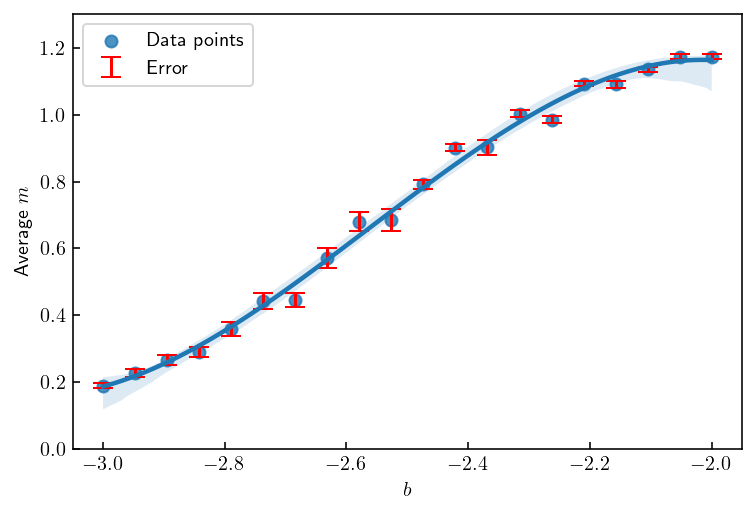

In [13]:
sns.regplot(x=blst,y=alst,order=3,label='Data points')
plt.errorbar(blst, alst, yerr=errorlst, fmt='none', capsize=5, zorder=1, color='r',label='Error')
plt.xlabel('$b$')
plt.ylabel('Average $m$')
plt.ylim(0,1.3)
plt.legend()

We can now see that the average magnetization is better for larger values of $b$.

***